LOADING CSV'S

In [77]:
# Importing a CSV into python as a list of list or a list of dictionaries 

# Way 1 - each row is a list so list of lists
# Way 2 - each row is a dictionary (good when you have headers as well) so list of dictionaries


# Way 2
import unicodecsv
import os

enrollments = []

f1 = open("enrollments.csv",'rb')  #Rb specifies that we are just reading the file and as binary input
reader = unicodecsv.DictReader(f1)

for i in reader:
    enrollments.append(i)
f1.close()

# Shorter function for doing the same thing

def read_csv(filename):
    with open(filename,'rb') as f:          # Used the with function here hence no need to use .close()
        iterator = unicodecsv.DictReader(f) # Directly converted iterator to list hence no need for for loop
        return list(iterator)
    

enrollments =read_csv("enrollments.csv")  #'u' in the begining of each dict key and value means that the value has been represented
                                          # as unicode which offers more letters than ascii

daily_engagement =read_csv("daily_engagement.csv")
project_submissions =read_csv("project_submissions.csv")

print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


FIXING DATA TYPES

In [219]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[1]

TypeError: strptime() argument 1 must be string, not datetime.datetime

In [79]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed'])) # Direct conversion of decimals from string to int would throw error
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [80]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date']) # Creation date is now a object of the datetime class 
                                                                          # created using the strptime function in the datetime class
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

INVESTIGATING DATA

In [81]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
data_sets = [enrollments,project_submissions,daily_engagement]

# Only execute once to rename 'acct' to 'account key' in the daily engagement file
for i in daily_engagement:   
    i['account_key'] = i.pop('acct')
    
    
# Function for No of unique students in each dataset
def no_unique_stud(data_list):
    all_studs = []
    for i in data_list:
        if i['account_key'] not in all_studs:    # We could have used set() data structure instead of list and not have to use 
            all_studs.append(i['account_key'])   # 'not in' keyword then
    return len(all_studs)


# No of rows and unique students
for i in data_sets:
    print "No of rows in each : "  + str(len(i))
    print "No of unique students" + str(no_unique_stud(i))

No of rows in each : 1640
No of unique students1302
No of rows in each : 3642
No of unique students743
No of rows in each : 136240
No of unique students1237


In [101]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
data_sets = [enrollments,project_submissions,daily_engagement]

def list_unique_stud(data_list):
    all_studs = set()
    for i in data_list:  
            all_studs.add(i['account_key'])   # Using sets this time
    return all_studs

enrol_studs = list_unique_stud(enrollments)
daily_engagement_stud = list_unique_stud(daily_engagement)

extra_enrol = enrol_studs.difference(daily_engagement_stud)

for i in extra_enrol:       # As sets dont support indexing (unordered pair of elements printing the first element of the set)
    print i
    break
    
#Another approach

ex = list(extra_enrol)[0]  #- convert to list and print 
ex = '1304'

for i in enrollments:
    if i['account_key'] ==ex:
        print i

1304
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}


In [203]:
extra_2 = enrol_studs.difference(daily_engagement_stud) 
len(extra_2)

65

In [205]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising unique account keys that are left (enrollments missing from
## the engagement table) that remain, if any.

len(extra_enrol)
extra_enrol_dict = {}

for i in extra_enrol:
    for j in enrollments:
        if j['account_key'] ==i:
            if (j['cancel_date'] == None) or (j['join_date'] == None):
                extra_enrol_dict[i] = False
            else:
                extra_enrol_dict[i] = j['cancel_date'] == j['join_date']
          
a= 0
for i in extra_enrol_dict.iteritems():
    if i[1] == False:
        a +=1
    
print a

# Same thing(but if there are duplicate account keys in enrollment they are counted twice)
# no of suprising data points left but shorter approach - 

b = 0
for i in enrollments:
    if i['account_key'] not in daily_engagement_stud and i['cancel_date'] != i['join_date']:
        b +=1
b

# Note - We found out that these 3 records were of test accounts ie udacity test accounts which are not really students 
# Hence we are going to remove all udacity test accounts which will also remove these 3 wierd accounts before we start the 
# Data exploration phase

2


3

Tracking Down the Remaining Problems

In [218]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        
print "Total account keys that are related to test accounts : " + str(len(udacity_test_accounts))

# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

Total account keys that are related to test accounts6


In [220]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [249]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for i in non_udacity_enrollments:
    if i['days_to_cancel'] > 7 or i['is_canceled'] == False: 
        
        account_key = i['account_key']
        join_date = i['join_date']
        
        if account_key not in paid_students or paid_students[account_key] < join_date:  # Saving only the latest join date in case
            paid_students[account_key] = join_date                                      # a student has 2 records in enrollment table
                                                                                      # and hence has 2 join dates
                
print len(paid_students)

995

Getting Data from First Week

In [313]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [314]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for i in non_udacity_engagement:
    if i['account_key'] in paid_students.keys() and within_one_week(paid_students[i['account_key']],i['utc_date']):        
        paid_engagement_in_first_week.append(i)
        
len(paid_engagement_in_first_week)        
# 21508
# 6919 - New records after using time.delta.days >0

6919

Exploring Student Engagement

In [315]:
# Interesting conversion - using defaultdict
# Converting paid_engagement_in_first_week from a list of dicts to a single dict with key as account keys and all the 
# corrospoding records for the account key as a list 

from collections import defaultdict
engagement_by_account = defaultdict(list)

for engagement in paid_engagement_in_first_week:
    engagement_by_account[engagement['account_key']].append(engagement)
    

engagement_by_account.items()[0]

(u'1200',
 [{'account_key': u'1200',
   u'lessons_completed': 1,
   u'num_courses_visited': 2,
   u'projects_completed': 0,
   u'total_minutes_visited': 114.853432,
   u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)},
  {'account_key': u'1200',
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': 0,
   u'total_minutes_visited': 43.4168625,
   u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)},
  {'account_key': u'1200',
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': 0,
   u'total_minutes_visited': 187.776832833,
   u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)},
  {'account_key': u'1200',
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': 0,
   u'total_minutes_visited': 150.081577333,
   u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)},
  {'account_key': u'1200',
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': 0,
   u'total_minutes_visited': 191.6

In [316]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_minutes_by_account = {}

for k,v in engagement_by_account.items():
    mins = 0
    for dict_1 in v:
        mins = mins + dict_1['total_minutes_visited']
    total_minutes_by_account[k] = mins

total_minutes_by_account

import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)
print 'Initial max was :10000 mins'

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [318]:
#####################################
#                 8                 #
#####################################

## Debugging maximum minutes as they are more than the mins in a week
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

edge_cases = [k for k,v in total_minutes_by_account.items() if v>9000]

a= []
for i in edge_cases:
    a =  engagement_by_account[i] 

# Interestingly we see that the date entries for this individual span for more than a week showing that there is something wrong
# with the datediff function that we created earlier  which we used to find the difference between the engagement records and
# the enrollment date we took enrollment cases less than 7 days and hence also took cases for less than any day as we did not 
# put check for <0 

# After putting the check no cases with 10,000 mins now

a

[]

Lessons Completed in First Week

In [371]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.


from collections import defaultdict

def engagement_by_account(paid_engagement_in_first_week):
    engagement_by_account = defaultdict(list)
    for engagement in paid_engagement_in_first_week:
        engagement_by_account[engagement['account_key']].append(engagement)
    
    return engagement_by_account
    

def variable_grouped_by_account(engagement_by_account,variable):
    
    lessons_completed_by_account = {}
    for k,v in engagement_by_account.items():
        mins = 0
        for dict_1 in v:
            mins = mins + dict_1[variable]
        lessons_completed_by_account[k] = mins
        
    return lessons_completed_by_account


import numpy as np

# Summarize the data about minutes spent in the classroom

def summarize(dictionary):
    total_minutes = dictionary.values()
    print 'Mean:', np.mean(total_minutes)
    print 'Standard deviation:', np.std(total_minutes)
    print 'Minimum:', np.min(total_minutes)
    print 'Maximum:', np.max(total_minutes)


engage_by_account = engagement_by_account(paid_engagement_in_first_week)
group_dict = variable_grouped_by_account(engage_by_account,'lessons_completed')
summarize(group_dict)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


Number of Visits in First Week

In [386]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
## Recreating the grouping function here by adding a counter for weather the student visited a course on any particular day or not
## Note : There are engagement records where the no of courses visited by a student are 0 that day.

def variable_grouped_by_account_1(engagement_by_account):
    
    group_variable = {}
    for k,v in engagement_by_account.items():   
        days_visit = 0
        for dict_1 in v:
            if dict_1['num_courses_visited'] > 0:
                days_visit += 1 
        group_variable[k] = days_visit
        
    return group_variable

summarize(variable_grouped_by_account_1(engage_by_account))

Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


 Splitting out Passing Students

In [367]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

# passing_engagement =
# non_passing_engagement =

# paid_engagement_in_first_week

passed_accounts = []
passing_engagement = []
non_passing_engagement = []

for i in non_udacity_submissions:

    if i['assigned_rating'] in ['PASSED','DISTINCTION'] and i['lesson_key'] in subway_project_lesson_keys:
        passed_accounts.append(i['account_key'])

for j in paid_engagement_in_first_week:
    if j['account_key'] in passed_accounts:
        passing_engagement.append(j)
    else:
        non_passing_engagement.append(j)

        
print "No of students who did not pass the 1st assignment" + str(len(non_passing_engagement))
print "No of students who passed the 1st assignment" + str(len(passing_engagement))

2392
4527
6919


656

Comparing the Two Student Groups

In [372]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

engage_by_account = engagement_by_account(passing_engagement)
group_dict = variable_grouped_by_account(engage_by_account,'total_minutes_visited')
print summarize(group_dict)

engage_by_account = engagement_by_account(non_passing_engagement)
group_dict_1 = variable_grouped_by_account(engage_by_account,'total_minutes_visited')
print summarize(group_dict_1)

Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
None
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
None


Making Histograms

(array([ 226.,   46.,   21.,   13.,   12.,    5.,    1.,    8.,    3.,
           3.,    2.,    0.,    1.,    0.,    1.,    4.,    0.,    0.,
           0.,    2.]),
 array([    0.        ,    88.42613747,   176.85227493,   265.2784124 ,
          353.70454987,   442.13068733,   530.5568248 ,   618.98296227,
          707.40909973,   795.8352372 ,   884.26137467,   972.68751213,
         1061.1136496 ,  1149.53978707,  1237.96592453,  1326.392062  ,
         1414.81819947,  1503.24433693,  1591.6704744 ,  1680.09661187,
         1768.52274933]),
 <a list of 20 Patch objects>)

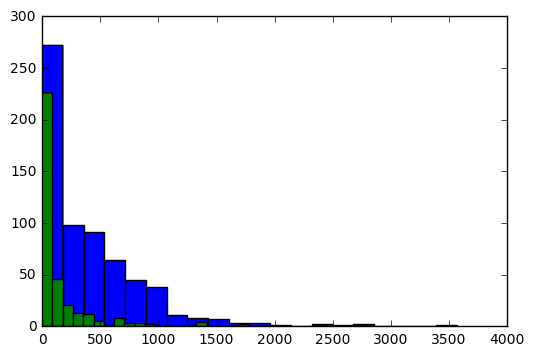

In [378]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
import seaborn as sns
% matplotlib inline
from matplotlib import pyplot as plt  # or import matplotlib.pyplot as plt
plt.hist(group_dict.values(),bins = 20)
plt.hist(group_dict_1.values(),bins = 20)

In [383]:
os.path.abspath

<function abspath at 0x000000000211E828>
